Import the necesssary packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from PIL import Image, ImageOps


Load the data

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Data analysis

In [ ]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
y_train[0]

5

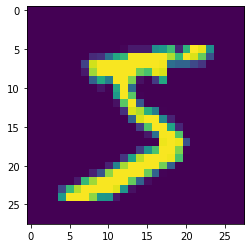

In [ ]:
plt.imshow(X_train[0])

Data pre processing

In [ ]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')

In [ ]:
number_of_classes = 10
Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

In [ ]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Create model

In [ ]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(Flatten())
model.add(Dense(number_of_classes, activation="softmax"))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=["accuracy"])

Train the model

In [ ]:
model.fit(X_train, Y_train, batch_size=32, epochs=5, validation_data=(X_test,Y_test))

Epoch 1/5
1875/1875 [==============================] - 204s 108ms/step - loss: 0.2100 - accuracy: 0.9534 - val_loss: 0.1013 - val_accuracy: 0.9712
Epoch 2/5
1875/1875 [==============================] - 203s 108ms/step - loss: 0.0670 - accuracy: 0.9795 - val_loss: 0.0810 - val_accuracy: 0.9777
Epoch 3/5
1875/1875 [==============================] - 203s 108ms/step - loss: 0.0483 - accuracy: 0.9850 - val_loss: 0.0975 - val_accuracy: 0.9730
Epoch 4/5
1875/1875 [==============================] - 204s 109ms/step - loss: 0.0353 - accuracy: 0.9889 - val_loss: 0.0803 - val_accuracy: 0.9784
Epoch 5/5
1875/1875 [==============================] - 210s 112ms/step - loss: 0.0274 - accuracy: 0.9914 - val_loss: 0.0899 - val_accuracy: 0.9800


Teat the model

In [ ]:
metrics = model.evaluate(X_test, Y_test, verbose=0)
print("Metrics (Test Loss & Test Accuracy): ")
print(metrics)

Metrics (Test Loss & Test Accuracy): 
[0.0899372473359108, 0.9800000190734863]


In [ ]:
prediction = model.predict(X_test[:4])
print(prediction)

1/1 [==============================] - 0s 105ms/step
[[7.71965972e-07 4.24054270e-20 4.66041483e-10 1.61230210e-10
  2.46632023e-17 1.05241303e-15 3.34039351e-22 9.99999285e-01
  2.22894381e-12 1.08536602e-09]
 [6.94213682e-08 2.24868391e-09 9.99999166e-01 5.13362269e-12
  7.12972366e-08 1.88677886e-16 7.52318442e-07 1.11063912e-19
  6.23968655e-11 7.44492197e-17]
 [6.85692267e-11 9.99999881e-01 2.86895008e-10 1.93139129e-16
  1.05465446e-07 2.78358274e-11 4.81805873e-10 7.97304930e-11
  4.59958127e-10 1.49924967e-14]
 [1.00000000e+00 1.46806878e-18 4.49679227e-08 8.94379853e-14
  4.90528842e-13 2.28314971e-11 5.99978955e-09 2.29979299e-11
  3.68161161e-11 2.89824453e-09]]


Save the model

In [ ]:
model.save("model.h5")

Test the saved model

In [ ]:
model=load_model("model.h5")

In [ ]:
img = Image.open("sample.png").convert("L")
img = img.resize((28, 28))
img2arr = np.array(img)
img2arr = img2arr.reshape(1, 28, 28, 1)
results  = model.predict(img2arr)
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Label")
print(results)

1/1 [==============================] - 0s 435ms/step 0 8 Name: Label, dtype: int64